In [1]:
import cv2
import matplotlib.pyplot as plt

C:\Users\Asus\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


(<Figure size 640x480 with 1 Axes>,
 (-0.5, 511.5, 125.5, -0.5))

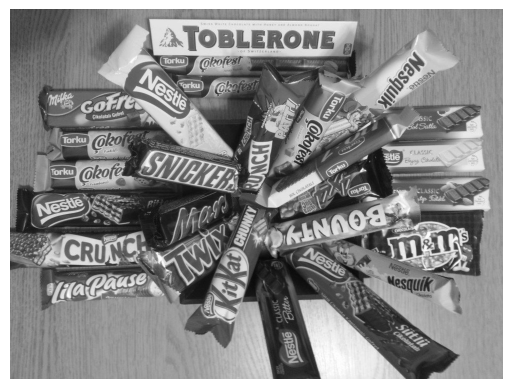

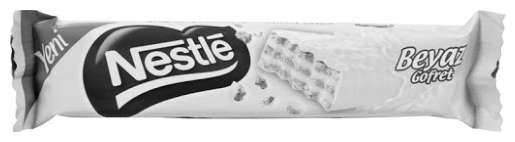

In [2]:
# ana görüntüyü içe aktar
chos = cv2.imread("chocolates.jpg", 0)
plt.figure(), plt.imshow(chos, cmap = "gray"),plt.axis("off")

# aranacak olan görüntü
cho = cv2.imread("nestle.jpg", 0)
plt.figure(), plt.imshow(cho, cmap = "gray"),plt.axis("off")

(<matplotlib.image.AxesImage at 0x225664a40a0>,
 (-0.5, 1521.5, 757.5, -0.5),
 Text(0.5, 1.0, 'orb'))

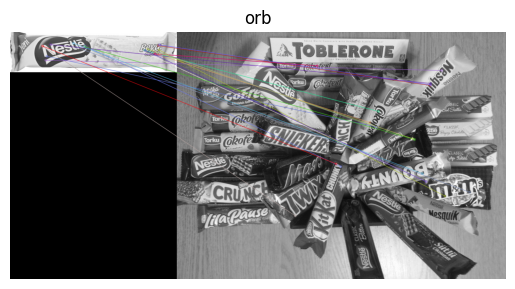

In [8]:
# orb tanımlayıcı
# köşe-kenar gibi nesneye ait anahtar noktaları tespit eder
orb = cv2.ORB_create()

# anahtar nokta tespiti
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(chos, None)

# bf matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
# Noktaları Eşleştir
matches = bf.match(des1, des2)

# Mesafeye göre sırala
matches = sorted(matches, key = lambda x: x.distance)

# eşleşen resimleri görüntüleyelim
plt.figure()
img_match = cv2.drawMatches(cho, kp1, chos, kp2, matches[:20], None, flags = 2)
plt.imshow(img_match), plt.axis("off"), plt.title("orb")


 Orb tanımlayıcısı iyi bir sonuç vermedi....  Şimdide sift tanımlayıcısı deneyelim

In [9]:
pip install opencv-contrib-python --user  # sift opencv ye dışardan eklendiği için bunu yazmazsak hata alabiliriz.

Note: you may need to restart the kernel to use updated packages.


(<matplotlib.image.AxesImage at 0x22565e741c0>,
 (-0.5, 1521.5, 757.5, -0.5),
 Text(0.5, 1.0, 'sift'))

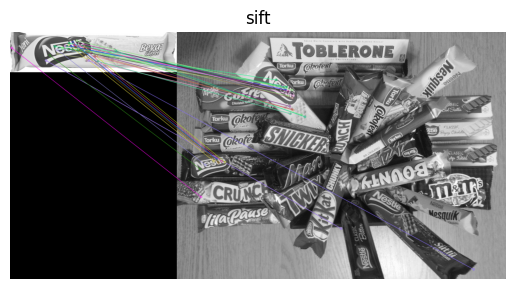

In [10]:
# sift tanımlayıcısı
sift = cv2.xfeatures2d.SIFT_create()
# anahtar nokta tespiti
kp1, des1 = sift.detectAndCompute(cho, None)
kp2, des2 = sift.detectAndCompute(chos, None)

# bf matcher
bf = cv2.BFMatcher()

matches = bf.knnMatch(des1, des2, k = 2)

guzel_eslesme = []

for match1, match2 in matches:
    
    if match1.distance < 0.75*match2.distance:
        guzel_eslesme.append([match1])
        
plt.figure()  
sift_matches = cv2.drawMatchesKnn(cho,kp1,chos,kp2,guzel_eslesme,None, flags=2)
plt.imshow(sift_matches), plt.axis("off"), plt.title("sift")